# Les optimisations de portefeuilles

# Introduction

Dans ce notebook, je vais d'une part traiter les optimisations de portefeuille linéaire, ca peut être par exemple découper un investissement de façon judicieuse; et dans un second temps la fameuse optimisation de portefeuille  de j.Markovitz et sa fameuse frontière efficace ( Efficient frontier), cela n'est pas linéaire.

Je résouds avec les solveurs Python.

Etude globale réalisée par <b>Estelle Derrien - Github Estelle15000</b>

!!! CREATION EN COURS !!!!

# Sommaire

- 1. <b>L'optimisation de portefeuille linéaire (Modèle de choix binaire)</b>
        - Notre problème de base de Excel easy .com
        - Modélisation mathématique
        - Solution simple avec Python Pulp
- 2. <b>Exemple de l'Entreprise Newton</b>
        - Notre problème de base de de Kenneth A.Barker
        - Modélisation mathématique
        - Solution en itérant avec Python Pulp
- 3. <b>Optimisation de portefeuille linéaire (Modèle de mélange linéaire en %).</b>
        - Notre problème de base de Estelle Derrien
        - Modélisation mathématique
        - Solution avec Python Pulp
- 4. <b>Optimisation financière en nombres entiers</b>
        - Notre problème de base de Mastering Python for Finance.pdf page 36
        - Modélisation mathématique
        - Solution avec Python Pulp
- 5. <b>Optimisation financière linéaire avec prise en compte des risques</b>
        - Notre problème de base de Andrew Hershy
        - Modélisation mathématique
        - Solution avec Python Pulp
- 6. <b>L'optimisation de portefeuille Markovitz</b>
        - Description
        - Les différentes méthodes d'optimisation de Portefeuille
        - Notre problème de base
        - Modélisation mathématique
        - Le logiciel PyPortfolioOpt
        - Solution avec Cvxopt
        - Solution avec Python Gekko




## Sources 

Les livres suivants : 
 
- Practical management science de Wayne Winston
- Operations research de Hillier
- Operations Management de R Russel
- Optimizations modeling with spreadsheets de R. Baker
- Recherche opérationnelle - Méthodes d'optimisation en Gestion

# 1. Optimisation de portefeuille linéaire (Modèle de choix binaire).

## Notre problème de base.

J'ai un capital de 50Keuros.<br>
On a 7 investissements possibles, <br>
qui coûtent respectivement 12, 10, 15, 7, 14, 18, 16 Keuros.<br>
qui rapportent 42,47,21,36,18,33 et 45 Keuros.<br>

Contraintes :
- seul l'investissement Un ou l'investissement Deux peut être réalisé. 
- seul l'investissement Trois ou l'investissement Quatre peut être réalisé. 
- l'investissement Six et l'investissement Sept ne peuvent être réalisés que si l'investissement Cinq est réalisé.

Quels investissement choisir pour maximiser le profit ?

Lien vers la version Excel : 
https://www.excel-easy.com/examples/capital-investment.html

## Modélisation mathématique
 A venir.

## Solution avec Pulp

In [79]:
from pulp import *
 
# Les variables de décision sont le choix d'investissement
I1 = LpVariable('I1', lowBound=0, cat='Binary')
I2 = LpVariable('I2', lowBound=0, cat='Binary')
I3 = LpVariable('I3', lowBound=0, cat='Binary')
I4 = LpVariable('I4', lowBound=0, cat='Binary')
I5 = LpVariable('I5', lowBound=0, cat='Binary')
I6 = LpVariable('I6', lowBound=0, cat='Binary')
I7 = LpVariable('I7', lowBound=0, cat='Binary')
 
# C'est un problème de maximisation
Problem = LpProblem('optimisation_portefeuille',LpMaximize)
 
# La fonction objectif est de maximiser le profit.
Problem += 42*I1 + 47*I2 + 21*I3 + 36*I4 + 18*I5 + 33*I6 + 45*I7
 
# Les contraintes
# Constrainte de budget maximum.
Problem += 12*I1 + 10*I2 + 15*I3 + 7*I4 + 14*I5 + 18*I6 + 16*I7 <= 50

# "Seul l'investissement 1 ou 2 peut être choisi'
# Si la somme de I1 et I2 est égale à 1, alors seul l'une d'entre elles peut être choisies
# parce que ce sont des variables binaires.
Problem += I1 + I2 == 1

# "Seul l'investissement 3 ou 4 peut être choisi"
Problem += I3 + I4 == 1

# L'investissement Six et l'investissement Sept 
# ne peuvent être réalisés que si l'investissement Cinq est réalisé.  ( A vérifier)
Problem += I6 + I7 >= I5


# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Profit maximisé = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix d\'investissement : ',i.name, '=', i.varValue)
  

Statut: Optimal
Profit maximisé =  146.0
Choix d'investissement :  I2 = 1.0
Choix d'investissement :  I4 = 1.0
Choix d'investissement :  I5 = 1.0
Choix d'investissement :  I7 = 1.0


# L'entreprise newton

## Notre problème de base :


Auteur :  Optimizations models with Spreadsheets de Kenneth A.Barker.<br>

La division A de la Newton Corporation a reçu 40 millions de dollars pour des projets d'immobilisations cette année. 
Les gestionnaires de la division A ont examiné diverses possibilités et ont proposé cinq projets au comité de budgétisation des immobilisations. 
Les projets couvrent une variété d'activitéset domaines fonctionnels, et il n'y en a qu'un de chaque type. Les projets sont listés ci-dessous.<br>

- P1 Rénover l'outil de production pour plus d'efficacité.
- P2 Licence pour une nouvelle technologie à utiliser en production.
- P3 Développer la publicité en nommant un stade.
- P4 Acheter un terrain et construire un nouveau siège social.
- P5 Introduire un nouveau produit pour compléter la gamme actuelle.

Chaque projet a une valeur actualisée nette (VAN) estimée, et chacun nécessite une dépense en capital,
qui doit provenir du budget des projets d'immobilisations. Le tableau suivant résume les possibilités, telles qu'elles ont été fournies au comité, avec tous les chiffres en millions de dollars



In [80]:
# Projet        P1      P2      P3      P4      P5
# Profit(NPV)   2.0     3.6     3.2     1.6     2.8
# Dépense       12      24      20      8       16

## Modélisation mathématique.

A venir !

## Solution avec Python Pulp

Cette fois ci, j'utilise les itérations (Boucles For). le résultat est identique à celui du live de Kenneth Barker, avec le solveur Excel.

In [81]:
from pulp import *
 
# Les variables de décision sont le choix d'investissement
projets = ['P1','P2','P3','P4','P5']

# Renseigner le profit prévisionnel par projet
profits = {'P1':2.0,'P2':3.6,'P3':3.2,'P4':1.6,'P5':2.8}

# Renseigner les dépenses par projet
depenses = {'P1':12,'P2':24,'P3':20,'P4':8,'P5':16}

# C'est un problème de maximisation
Problem = LpProblem('optimisation_portefeuille',LpMaximize)

# On crée automatiquement 
# un dictionnaire de variables binaire de choix oui/non (Choisit-on cet investissement ou pas ?)
x = LpVariable.dicts("projets", projets , lowBound=0, cat='Binary')
 
# La fonction objectif est de maximiser le profit.
Problem += lpSum( [profits[i] * x[i] for i in projets])
 
# Les contraintes
# Constrainte de budget maximum.
Problem += lpSum([depenses[i] * x[i] for i in projets ]) <= 40,"Budget"

# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Profit maximisé = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Choix d\'investissement : ',i.name, '=', i.varValue)

Statut: Optimal
Profit maximisé =  6.800000000000001
Choix d'investissement :  projets_P1 = 1.0
Choix d'investissement :  projets_P2 = 0.0
Choix d'investissement :  projets_P3 = 1.0
Choix d'investissement :  projets_P4 = 1.0
Choix d'investissement :  projets_P5 = 0.0


# 3. Optimisation de portefeuille linéaire (Modèle de mélange).

Ici, on va effectuer une optimisation de type mélange appliquée à un portefeuille, on obtient une sélection exprimée en poucentages.

## Notre problème de base.

## Modèle mathématique
Création en cours

## Solution avec Python Pulp

In [82]:
""" 
Etudes : 

Maximiser le profit d' un portefeuille crypto dont les paramètres sont exprimés en %

note : 
- Les contraintes sont exprimées en % lors de l'initialisation des datas
- Par contre, dans les functions, on transforme tout en décimal, et on indique la loi de conservation == 100


"""

from pulp import *

# --------------------------------------------------------
# PARTIE 1 : ON INITIALISE LES DATAS DE NOTRE PORTEFEUILLE
# --------------------------------------------------------

# Liste des cryptos 
coinsList = ['bitcoin','litecoin','euthereum','ripple']

# Renseigner la marge prévisionnelle de la monnaie en %
margins = {"bitcoin": 18,"litecoin": 35,"euthereum":18,"ripple":16}

# Renseigner   la fiabilité de la monnaie en  %
fiability = {"bitcoin": 9,"litecoin": 8,"euthereum":5,"ripple":13}

# Limites minimales d'achat de chaque coins en %
lowbounds = {"bitcoin": 10,"litecoin": 10,"euthereum":8,"ripple":5}

# --------------------------------------------------------
# PARTIE 2 : ON CREE NOTRE PROGRAMME LINEAIRE
# --------------------------------------------------------

# Création du problème : 
prob = LpProblem("Portfolio_Opt",LpMaximize)

# Création des variables de décision
decision_variables = LpVariable.dicts("Maximisation de profit",coinsList,cat='Continuous')

# On ajoute les limites inférieures de chaque variable de décision
for i in decision_variables.keys():
    decision_variables[i].lowBound = lowbounds[i]

# La function à maximiser
prob += lpSum([margins[i] / 100 * decision_variables[i] for i in coinsList])

# Cette Fonction est nécessaire lorsque les contraintes sont exprimées en %
prob += lpSum([1 * decision_variables[f] for f in coinsList]) == 100, "budget"

# Les contraintes exprimées en % , On veut un minimum de 9%  de fiabilité global 
prob += lpSum([fiability[f] / 100 * decision_variables[f] for f in coinsList]) >= 9, "fiability"

# --------------------------------------------------------
# PARTIE 3 : ON RESOUDS ET IMPRIME LE RESULTAT DE  NOTRE PROGRAMME LINEAIRE
# --------------------------------------------------------

# Imprimer le look du problème
# print(prob)
# print(LpStatus[prob.status])

# Ecriture du programme linéaire dans un fichier
# prob.writeLP("Portfolio_Opt.lp")

# Résoudre le programme linéaire.
prob.solve()

# Le meilleur portefeuille est exprimé en %
print("Le portefeuille de qualité optimum est \n")
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Le meilleur pourcentage global trouvé pour le portefeuille, exprimé en %
print(prob.objective.value())


Le portefeuille de qualité optimum est 

Maximisation_de_profit_bitcoin = 10.0
Maximisation_de_profit_euthereum = 8.0
Maximisation_de_profit_litecoin = 59.2
Maximisation_de_profit_ripple = 22.8
27.608


# 4. Optimisation financière en nombres entiers

## Notre problème de base de Mastering Python for Finance.pdf page 36

Supposons que nous devions passer 150 contrats dans un titre exotique en vente libre particulier auprès de trois concessionnaires.

- Le concessionnaire(dealer) X facture 500 \$ par contrat plus des frais de traitement de 4 000 \$, quel que soit le nombre de contrats vendus. 

- Le concessionnaire Y facture 450 \$ par contrat plus des frais de transaction de 2 000 \$. 

- Le concessionnaire Z facture 450 \$ par contrat plus des frais de 6 000 \$. 

- Le concessionnaire X vendra au plus 100 contrats, le concessionnaire Y au plus 90 et le concessionnaire Z au plus 70. 

- Le volume de transaction minimum de tout courtier est de 30 contrats s'il y en a avec ce courtier. 


Comment minimiser le coût d'achat de 150 contrats?

SOURCE : Mastering Python for Finance.pdf page 36

# Solution avec Pulp

""" 
La variable dealers contient simplement les identificateurs de dictionnaire qui seront utilisés ultérieurement 
pour référencer les listes et les dictionnaires. 

Les variables variables_costs et fixed_costs sont des dictionnaires qui contiennent leur coût de contrat respectif 
et les frais facturés par chaque concessionnaire. 

Le solveur PuLP résout les valeurs des quantités et is_orders, qui sont définies par la fonction LpVariable. 

La fonction dicts indique à PuLP de traiter la variable affectée comme un objet de dictionnaire, 
en utilisant la variable dealers pour le référencement. Notez que la variable des quantités a une limite inférieure de 0 
qui nous empêche d'entrer une position courte sur des titres. 

Les valeurs is_orders sont traitées comme des objets binaires, 
indiquant si nous devons conclure une transaction avec l'un des revendeurs. 

Voir l'équation dans le livre page 34
L'équation indique simplement que nous voulons minimiser les coûts totaux avec la variable binaire i IsOrder, 
en déterminant s'il faut tenir compte des coûts associés à l'achat d'un concessionnaire spécifique si nous le souhaitons. 
Implémentons ce modèle en Python:



"""

In [83]:
# An example of implementing an integer programming model with binary conditions  

import pulp

dealers = ["X", "Y", "Z"] 
variable_costs = {"X": 500,"Y": 350, "Z": 450} 
fixed_costs = {"X": 4000,"Y": 2000,"Z": 6000}

# Define PuLP variables to solve 

quantities = pulp.LpVariable.dicts("quantity",dealers,lowBound=0,cat=pulp.LpInteger) 
is_orders = pulp.LpVariable.dicts("orders",dealers,cat=pulp.LpBinary)


# Initialize the model with constraints 
model = pulp.LpProblem("A_cost_minimization_problem",pulp.LpMinimize) 

model += sum([variable_costs[i]*quantities[i] + fixed_costs[i]*is_orders[i] for i in dealers]),"Minimize portfolio cost" 
model += sum([quantities[i] for i in dealers]) == 150,"Total contracts required" 

model += is_orders["X"]*30 <= quantities["X"] <= is_orders["X"]*100, "Boundary of total volume of X" 
model += is_orders["Y"]*30 <= quantities["Y"] <= is_orders["Y"]*90, "Boundary of total volume of Y" 
model += is_orders["Z"]*30 <= quantities["Z"] <= is_orders["Z"]*70, "Boundary of total volume of Z" 

model.writeLP("finances2.lp")

model.solve()


for v in model.variables():
    print(v.name, "=", v.varValue)


orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0


 Ceci est un exemple d'implémentation d'un modèle de programmation entier avec des variables binaires dans le mauvais sens.

In [84]:
# Initialize the model with constraints 
# model = pulp.LpProblem("A cost minimization problem",  pulp.LpMinimize) 

# model += sum([(variable_costs[i] * quantities[i] + fixed_costs[i])*is_orders[i] for i in dealers]),"Minimize portfolio cost" 

# model += sum([quantities[i] for i in dealers]) == 150,"Total contracts required"

# model += 30 <= quantities["X"] <= 100, "Boundary of total volume  of X" 
# model += 30 <= quantities["Y"] <= 90, "Boundary of total volume of  Y" 
# model += 30 <= quantities["Z"] <= 70, "Boundary of total volume of  Z"

# model.solve()

# Pulp dit : TypeError: Non-constant expressions cannot be multiplied

""" 
Une approche différente avec des conditions binaires ...

Une autre méthode de formulation de l'objectif de minimisation consiste à placer toutes les variables inconnues de manière linéaire de sorte 
qu'elles soient additives( Voir le livre): 

Minimize variable cost quantity fixed cost IsOrder

En comparant avec l'équation objective précédente, 
nous obtiendrions les mêmes valeurs de coût fixe. 
Cependant, la variable inconnue i quantité reste dans 
le premier terme de l'équation. 
Par conséquent, la variable i quantité 
doit être résolue en fonction de telle que les contraintes sont énoncées comme suit:
Voir le livre page 35
"""

# 5. Optimisation financière linéaire avec prise en compte des risques

## Notre problème de base de Andrew Hershy

https://github.com/ahershy/Linear-Optimization-Portfolio/blob/master/Optimize%20Portfolio.ipynb

Il s'agit d'un problème d'optimisation linéaire du risque et du rendement d'un portefeuille. 
Notre objectif est de minimiser le risque du portefeuille tout en satisfaisant simultanément 5 contraintes:

1. La somme des investissements sera de 100 000 $

2. Le portefeuille a un rendement annuel d'au moins 7,5%

3. Au moins 50% des placements sont notés A

4. Au moins 40% des investissements sont immédiatement liquides

5. Les comptes d'épargne et les certificats de dépôt ne dépassent pas 30 000 dollars.

** Modélisation du LP :

Pour revoir le processus de résolution d'un problème d'optimisation linéaire, il y a 3 étapes:

1. Variables de décision: ici, il y a 8 variables de décision. Ce sont nos options d'investissement.
    
2. Objectif Fonction: Nous voulons minimiser le risque pour les 8 investissements. 
Voici les placements multipliés par leurs coefficients de risque respectifs.
0X1 + 0X2 + 25X3 + 30X4 + 20X5 + 15X6 + 65X7 + 40X8

3. Contraintes: Enfin, nous voulons définir exactement quelles sont nos contraintes. 
Celles-ci sont exprimées algébriquement ci-dessous dans le même ordre que nous avons énuméré les contraintes précédemment:

1. ΣXi = 100000
2. .04X1+.052X2+.071X3+.1X4+.82X5+.065X6+.2X7+.125X8 >= 7500
3. X1 + X2 + X5 + X7 >= 40000
4. X1 + X3 + X4 + X7 + X8 >= 40000
5. X1 + X2 <= 30000

Au cas où vous seriez confus au sujet des «7 500» de la contrainte n ° 2, ce serait le rendement annuel de 7,5% que nous recherchons multiplié par notre investissement de 100 000 $.

In [85]:
# Import du dataset

from pulp import *
import pandas as pd
# pip install xlrd

df = pd.read_excel('datasets/Fin_optimization.xls')
#df = pd.read_excel('datasets/fruitDataset.xlsx')
df


,Designation,Potential Investment,Expected Return,Rating,Risk,Liquidity
0,X1,Saving Account,0.040,A,0,Immediate
1,X2,Certificate of deposit,0.052,A,0,5-year
2,X3,Atlantic Lightning,0.071,B+,25,Immediate
3,X4,Arkansas REIT,0.100,B+,30,Immediate
4,X5,Bedrock Insurance Annuity,0.082,A,20,1-year
5,X6,Nocal Mining Bond,0.065,B+,15,1-year
6,X7,Minocompo System,0.200,A,65,Immediate
7,X8,Antony Hotels,0.125,C,40,Immediate



""" 
Joli look. Cependant, quelques modifications de mise en forme doivent être apportées pour avancer.

    Transformez les colonnes «Liquidité» et «Notes» en valeurs binaires. Ceci concerne les contraintes 3 et 4. 
    Les valeurs de chaîne pertinentes dans ces colonnes sont «Immédiat» pour la liquidité et «A» pour la notation. 
    Distinguer ces valeurs de chaîne des autres est nécessaire pour un calcul ultérieur.
    Créez une nouvelle colonne binaire pour le type d'investissement. 
    La contrainte n ° 5 se concentre sur les types d'investissement d'épargne et de CD, 
    donc les distinguer des autres types d'investissement aidera plus tard.
    Créez une colonne de tous les 1 pour Amt_invested. 
    Cela sera utile pour la contrainte n ° 1: la contrainte de portefeuille total de 100 000 $.
 """

In [86]:

#1's and 0's
df['Liquidity'] = (df['Liquidity']=='Immediate')
df['Liquidity'] = df['Liquidity'].astype(int)

#1's and 0's
df['Rating'] = (df['Rating']=='A')
df['Rating']= df['Rating'].astype(int)

#1's and 0's
savecd = [1,1,0,0,0,0,0,0]
df['Saving&CD'] = savecd

#1's and 0's
amt_invested = [1]*8
df['Amt_Invested'] = amt_invested
#df
# print(df)

#     Designation       Potential Investment  Expected Return  Rating  Risk  Liquidity  Saving&CD  Amt_Invested
# 0          X1             Saving Account            0.040       1     0          1          1             1
# 1          X2     Certificate of deposit            0.052       1     0          0          1             1
# 2          X3         Atlantic Lightning            0.071       0    25          1          0             1
# 3          X4              Arkansas REIT            0.100       0    30          1          0             1
# 4          X5  Bedrock Insurance Annuity            0.082       1    20          0          0             1
# 5          X6          Nocal Mining Bond            0.065       0    15          0          0             1
# 6          X7           Minocompo System            0.200       1    65          1          0             1
# 7          X8              Antony Hotels            0.125       0    40          1          0             1 


In [89]:
prob = LpProblem("Portfolio_Opt",LpMinimize)

# Create a list of the inventment items
inv_items = list(df['Potential Investment'])

# Create a dictinary of risks for all inv items
risks = dict(zip(inv_items,df['Risk']))

# Create a dictionary of returns for all inv items
returns = dict(zip(inv_items,df['Expected Return']))

#Create dictionary for ratings of inv items
ratings = dict(zip(inv_items,df['Rating']))

# Create a dictionary for liquidity for all inv items
liquidity = dict(zip(inv_items,df['Liquidity']))

#Create a dictionary for savecd for inve items
savecd = dict(zip(inv_items,df['Saving&CD']))

#Create a dictionary for amt as being all 1's
amt = dict(zip(inv_items,df['Amt_Invested']))



print(risks)

""" Ensuite, nous définissons nos variables de décision comme des investissements et y ajoutons quelques paramètres,

    Nom: pour étiqueter nos variables de décision
    Lowbound = 0: pour s'assurer qu'il n'y a pas d'argent négatif dans notre solution
    Continu: parce que nous avons affaire à des cents pour un dollar. 
"""
inv_vars = LpVariable.dicts("Potential Investment",inv_items,lowBound=0,cat='Continuous')

""" Enfin, nous ajoutons la variable de décision modifiée à notre variable 
de problème que nous avons créée précédemment et nous entrons en outre
 les contraintes. Nous parcourons les dictionnaires en utilisant 
 des «boucles for» pour chaque élément d'investissement. """

# Fonction objectif à minimiser : ON veut minimiser les risques
prob += lpSum([risks[i]*inv_vars[i] for i in inv_items])

# amt
prob += lpSum([amt[f] * inv_vars[f] for f in inv_items]) == 100000, "Investments"
prob += lpSum([returns[f] * inv_vars[f] for f in inv_items]) >= 7500, "Returns"
prob += lpSum([ratings[f] * inv_vars[f] for f in inv_items]) >= 50000, "Ratings"
prob += lpSum([liquidity[f] * inv_vars[f] for f in inv_items]) >= 40000, "Liquidity"
prob += lpSum([savecd[f] * inv_vars[f] for f in inv_items]) <= 30000, "Save and CD"
#print(prob)
# prob.writeLP("Portfolio_Opt.lp")
prob.solve()
print("Le portefeuille de qualité optimum est \n"+"-"*110)
for v in prob.variables():
        if v.varValue>0:
            print(v.name, "=", v.varValue)

""" Le portefeuille de qualité optimum sous contrainte de risques est
--------------------------------------------------------------------------------------------------------------
Potential_Investment_Arkansas_REIT = 22666.667
Potential_Investment_Bedrock_Insurance_Annuity = 47333.333
Potential_Investment_Certificate_of_deposit = 12666.667
Potential_Investment_Saving_Account = 17333.333 """

{'Saving Account': 0, 'Certificate of deposit': 0, 'Atlantic Lightning': 25, 'Arkansas REIT': 30, 'Bedrock Insurance Annuity': 20, 'Nocal Mining Bond': 15, 'Minocompo System': 65, 'Antony Hotels': 40}
Le portefeuille de qualité optimum est 
--------------------------------------------------------------------------------------------------------------
Potential_Investment_Arkansas_REIT = 22666.667
Potential_Investment_Bedrock_Insurance_Annuity = 47333.333
Potential_Investment_Certificate_of_deposit = 12666.667
Potential_Investment_Saving_Account = 17333.333


' Le portefeuille de qualité optimum sous contrainte de risques est\n--------------------------------------------------------------------------------------------------------------\nPotential_Investment_Arkansas_REIT = 22666.667\nPotential_Investment_Bedrock_Insurance_Annuity = 47333.333\nPotential_Investment_Certificate_of_deposit = 12666.667\nPotential_Investment_Saving_Account = 17333.333 '

# 6. L'optimisation de portefeuille Markovitz

## Description.

Lorsque l'investisseur doit faire une sélection d'investissements les plus judicieux, le risque est à prendre en compte. Avec la méthode Markovitz, on mesure le risque à l'aide de la méthode des moindres carrés pour chaque investissement disponible, puis ces calculs nous font apparaitre la frontière efficace, qui nous permet de sélectionner les meilleurs investissements.

Désormais, avec les solveurs, on peut entrer la formuler directement en python et visionner la frontière efficace 
avec Python.

<b>Code idéal:</b>
Le code idéal devrait pouvoir prendre une liste d'actions à partir d'un fichier excel, leur valeur, leur rendement , leur risque, puis permettre d'imprimer le portefeuille idéal, qui respecte la théroie de Markovitz, enfin, il faudrai pouvoir donner un investissement initial, et que le code Python calcule directement les montant sà investir dans chaque action, toujours en respectant la logique Markovitz, sachant qu'il existe d'autres logiques d'optimisation de Portefeuille.


## les différentes méthodes d'optimisation de portefeuilles (Anglais)

Portfolio Optimization Methods

    Modern Portfolio Theory. Modern portfolio theory (MPT) is a widely used method for portfolio optimization. ...
    Mean-Variance Optimization. ...
    Black-Litterman Model. ...
    Monte Carlo Simulation. ...
    Risk Parity. ...
    Risk Tolerance. ...
    Investment Time Horizon. ...
    Market Conditions.


Lire cette bonne introduction en Français:
https://meghara.com/le-modele-de-markowitz-en-python/

Un lien sympa : 
https://github.com/ahershy/Efficient-Frontier-Program/blob/master/markowitz-portfolio-optimization-gold-and-amazon.ipynb

## Le logiciel PyPortfolioOpt

Le logiciel PytportfolioOpt sur Github permet de charger un portefeuille d'actions et d'établir le meilleur Portefeuille.

Essayons de la faire fonctionner dans ce notebook.

## Le modèle mathématique

A venir ...

Vocabulaire :

- Retour : retour sur investissement ( Return en Anglais)
- Risque : Mesuré par l'écart type (Standard déviation en Anglais)

## Solution avec Cvxopt

Là, on génère des portefeuilles aléatoires (random).
Analyse en cours pour voir comment on va pouvoir intégrer de véritables données d'actions, et visionner les résultats.

     pcost       dcost       gap    pres   dres
 0: -3.2651e-03 -1.0570e+00  1e+00  2e-16  3e+00
 1: -5.7123e-03 -6.4691e-02  6e-02  1e-16  2e-01
 2: -2.4295e-02 -3.9014e-02  1e-02  1e-16  2e-17
 3: -2.7257e-02 -2.8756e-02  1e-03  2e-16  2e-17
 4: -2.7931e-02 -2.7999e-02  7e-05  1e-16  3e-17
 5: -2.7968e-02 -2.7969e-02  8e-07  2e-16  1e-17
 6: -2.7969e-02 -2.7969e-02  8e-09  1e-16  2e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0107e-03 -1.0554e+00  1e+00  2e-16  3e+00
 1: -4.4058e-03 -6.2803e-02  6e-02  2e-16  2e-01
 2: -2.1326e-02 -3.4904e-02  1e-02  1e-16  3e-17
 3: -2.4122e-02 -2.5429e-02  1e-03  2e-16  2e-17
 4: -2.4724e-02 -2.4777e-02  5e-05  2e-16  8e-18
 5: -2.4768e-02 -2.4769e-02  7e-07  1e-16  2e-17
 6: -2.4769e-02 -2.4769e-02  7e-09  2e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.0608e-04 -1.0536e+00  1e+00  0e+00  3e+00
 1: -2.9447e-03 -6.0703e-02  6e-02  1e-16  2e-01
 2: -1.8284e-02 -3.0687e

NameError: name 'stds' is not defined

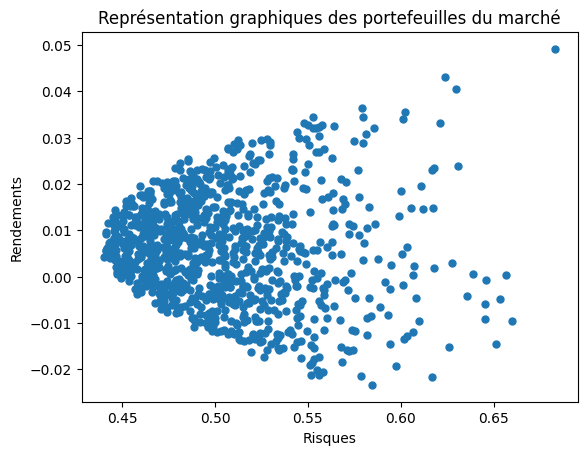

<Figure size 640x480 with 0 Axes>

In [88]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

# ### Param's :

np.random.seed(42)
## Number of assets
n_assets = 5
## Number of observations
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs) #Randomly generates returns on each asset, for each observations (like a timeseries)

# ### Functions : 

#Produces n random weights that sum to 1
def rand_weights(n):
    
    k = np.random.rand(n)
    return k / sum(k)


#Returns a random portfolio defined by the mean and standard deviation of returns  
def random_portfolio(returns):    

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T #mean returns of portfolio
    sigma = np.sqrt(w * C * w.T) #std returns of portfolio
    
    return mu, sigma

#Generate random portfolios, defined by their mean and std of returns, using the previous function
def generate_portfolios(n_portfolios=500):
    
    means, stds = np.column_stack([random_portfolio(return_vec) for _ in range(n_portfolios)])
    
    return means, stds

#Plot the randomly generated portfolios
def plot_portfolio(n_portfolios=500):
    means, stds = generate_portfolios(n_portfolios)
    fig = plt.figure()
    plt.plot(stds, means, 'o', markersize=5)
    plt.title("Représentation graphiques des portefeuilles du marché")
    plt.ylabel('Rendements')
    plt.xlabel('Risques')
    plt.savefig("Ptfs-Marchés.png",dpi=144)

#Compute the optimal portfolio, based on Markowitz theory - Source : https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/
def optimal_portfolio(returns):
    
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)] #Used to avoid linear mean
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

#Main program :

plot_portfolio(1000)
weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.plot(risks, returns, 'y-o')

plt.title("Frontière de l'efficience")
plt.ylabel('Rendements')
plt.xlabel('Risques')
plt.savefig("Frotnière-efficience.png",dpi=144)

print (weights)
print(np.sum(weights)) #100% is invested in n_assets (5 assets in 

## Solution avec Python Gekko

